In [1]:
# write stevens-schutzback method
import pickle
import datetime as dt
import numpy as np

from calendar import monthrange

from flowmeterAnalysis import readFiles

homeDir = 'P:\\PW-WATER SERVICES\\TECHNICAL SERVICES\\Anna'
pickleLocation = homeDir + '\\2018\\Python Objects\\'

detailFile = homeDir + '\\FMdata.csv'

In [2]:
with open(pickleLocation + 'flowDict.pickle', 'rb') as handle:
    dfFlows = pickle.load(handle)

In [58]:
fmname = 'BC21'
month = 5
dfFlow = dfFlows[fmname][
    dt.datetime(2018, month, 1):dt.datetime(2018, month, monthrange(2018,11)[1])]

df_details = readFiles.readFMdetails(detailFile)
D = df_details.loc[fmname, 'Diameter']

In [59]:
def rsquare(y, f):
    y = np.asanyarray(y)
    f = np.asanyarray(f)
    SStot = sum((y - np.mean(y))**2)
    SSres = sum((y - f)**2)
    return(1 - (SSres/SStot))

In [60]:
min(dfFlow['y (in)'].min(),D/5)

4.63

In [79]:
from scipy.optimize import least_squares

def gen_data(a, x):
    return(a * x)

def fun(params, x, y):
    return(params[0] * x - y)

def hydraulicRadius(d, ddog, D):
    de = d - ddog
    th = 2 * np.arccos(1 - (2 * de / D))
    if any(np.isnan(th)):
        th = th[~np.isnan(th)]
    P = D * th / 2
    Ae = (D**2 / 8) * (th - np.sin(th))
    return(Ae, P)

        
a = []
r2 = []
dogMax = min(0.99 * dfFlow['y (in)'].min(),D/5)
ddogList = np.linspace(0, dogMax, 100)
for i, ddog in enumerate(ddogList):
    d = dfFlow['y (in)'].values
    v = dfFlow['v (ft/s)'].values
    de = d - ddog
    if any(de/D > 1):
        v = v[de/D <= 1]
        de = de[de/D <= 1]        
    Ae, P = hydraulicRadius(de, 0, D)
    Rss = Ae / P
    res_lsq = least_squares(fun, -1, args = (Rss ** (2/3), v))
    a.append(res_lsq.x[0])
    r2.append(rsquare(
        y = v,
        f = gen_data(a[-1], x = Rss ** (2/3))))

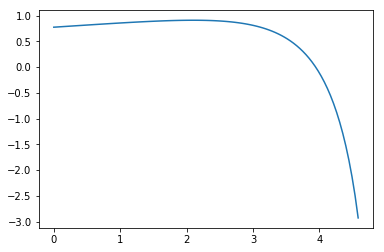

In [76]:
import matplotlib.pyplot as plt
plt.show()
fig, ax = plt.subplots()

ax.plot(ddogList, r2)

In [71]:
def maxAndIndex(mylist):
    import operator
    index, value = max(enumerate(mylist), key=operator.itemgetter(1))
    return(index, value)

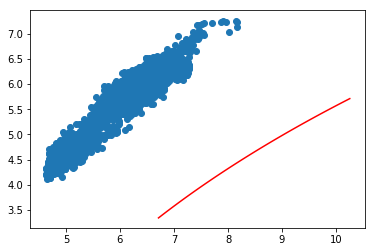

In [89]:
fig, ax = plt.subplots()

ax.scatter(dfFlow['y (in)'].values, 
           dfFlow['v (ft/s)'].values, 
           marker = 'o')

r2MaxIndx, r2Max = maxAndIndex(r2)
ddog = ddogList[r2MaxIndx]
d = np.linspace(dfFlow['y (in)'].min(), dfFlow['y (in)'].max(), 50)

Ae , P = hydraulicRadius(d, ddog, D)

ax.plot(d + ddog, 
        gen_data(a = a[0], x = (Ae/P) ** (2/3)),
       color = 'red')

In [20]:
ddogList

array([0.        , 0.0969697 , 0.19393939, 0.29090909, 0.38787879,
       0.48484848, 0.58181818, 0.67878788, 0.77575758, 0.87272727,
       0.96969697, 1.06666667, 1.16363636, 1.26060606, 1.35757576,
       1.45454545, 1.55151515, 1.64848485, 1.74545455, 1.84242424,
       1.93939394, 2.03636364, 2.13333333, 2.23030303, 2.32727273,
       2.42424242, 2.52121212, 2.61818182, 2.71515152, 2.81212121,
       2.90909091, 3.00606061, 3.1030303 , 3.2       , 3.2969697 ,
       3.39393939, 3.49090909, 3.58787879, 3.68484848, 3.78181818,
       3.87878788, 3.97575758, 4.07272727, 4.16969697, 4.26666667,
       4.36363636, 4.46060606, 4.55757576, 4.65454545, 4.75151515,
       4.84848485, 4.94545455, 5.04242424, 5.13939394, 5.23636364,
       5.33333333, 5.43030303, 5.52727273, 5.62424242, 5.72121212,
       5.81818182, 5.91515152, 6.01212121, 6.10909091, 6.20606061,
       6.3030303 , 6.4       , 6.4969697 , 6.59393939, 6.69090909,
       6.78787879, 6.88484848, 6.98181818, 7.07878788, 7.17575

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])